# Plotly


Plotly is a python library that allows you to make interactive data vizualizations. The base for this library is the javascript plotly library. 
For this project we used this package to explore data vizualizations using Jupyter notebooks, however plotly can also be used to create html files, or as part of Dash another tool created by plotly for web applications. 

There are approximately 40 chart types that can be made with this package.


# Pros of Plotly
https://towardsdatascience.com/4-reasons-why-plotly-is-the-best-visualization-library-18c27de05b95

# Getting Started

In [45]:
#importing packages
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load the penguins dataset
penguins = sns.load_dataset("penguins")
penguins.columns
#import warblers dataset
warblers = pd.read_csv("data/BTBW_measurements.csv")

# Plot Options

## Scatterplot

In [46]:


fig = px.scatter(penguins, x="body_mass_g", y="flipper_length_mm",
color_discrete_sequence=['Teal']) #make a scatterplot
fig.update_layout(title={"text": "Body Mass vs Flipper Length in Adelie, Chinstrap and Gentoo Penguins", "x": 0.5},
 yaxis_title="Flipper Length (mm)", xaxis_title = "Body Mass (g)") #update x and y axis
fig.show()

## Boxplot

In [47]:
sub_warblers = warblers[warblers['BirdSex'].notna()]
new_df = sub_warblers.loc[sub_warblers['BirdSex'].isin(['M','F'])] #select observations with known sex
fig = px.box(new_df, y="Mass", x = 'BirdSex') #make a boxplot
fig.update_layout(title={"text": "Black-throated Blue Warbler Mass", "x": 0.5}, #update title and center
 yaxis_title="Mass (g)", xaxis_title = "Sex") #update x and y labels 
fig.show()


## Histogram

In [48]:

fig = px.histogram(warblers, x='Year', color = 'Age' ) #make a histogram, color by age
fig.update_layout(title={"text": "Total Black-Throated Blue Warbler Captures by Year", "x": 0.5}, yaxis_title="Total")
fig.update_layout(bargap=0.2) #space out bars
fig.show()

In [49]:

fig = px.box(penguins, y="body_mass_g", x = "species") #create a boxplot
fig.update_layout(title={"text": "Body Mass of Penguins", "x": 0.5},
 yaxis_title="Body Mass (g)", xaxis_title = "Species") #add a title and labels
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([ #add dropdown menu with buttons
                dict(
                    args=["type", "box"], #change plot type to boxplot
                    label="Boxplot", #label the button
                    method="restyle" #modify data or data attributes
                ),
                dict(
                    args=["type", "violin"], #change plot type to violin, hybrid box plot and density plot
                    label="Violin", #label the button
                    method="restyle" #modify data or data attributes
                )
            ])
        ),
    ]
) 
fig.show()

# Seaborn and Plotly Comparison

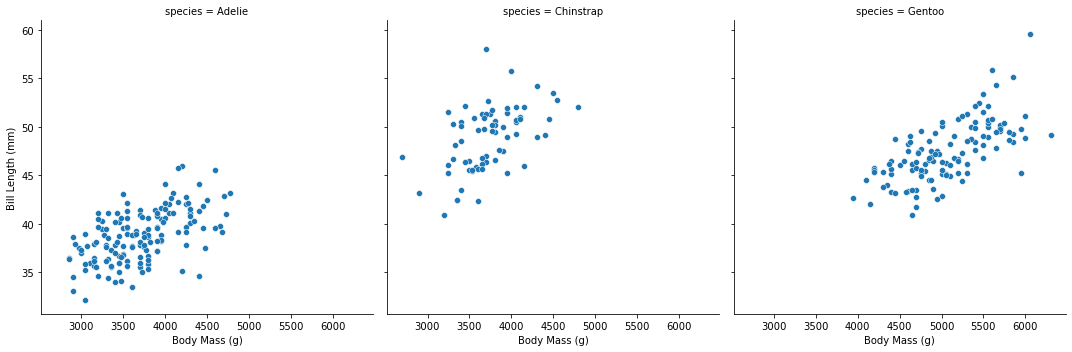

In [50]:
fig = sns.relplot(
    data = penguins,
     x = "body_mass_g",
      y = "bill_length_mm",
      col= "species") #create a new side by side plot for each species
fig.set_axis_labels(x_var= "Body Mass (g)", y_var = "Bill Length (mm)")


In [51]:

fig = px.scatter(penguins, x = "body_mass_g", y = "bill_length_mm",
 animation_frame = 'species', #changed animation based on species
  range_x=[2500,6500], #change x axis range
range_y = [25,60],#change y axis range 
color_discrete_sequence=['purple']) #change color to purple
fig.update_layout(title={"text": "Penguin Body Mass vs Bill Length", "x": 0.5},
 xaxis_title=" Body Mass (g)", yaxis_title = "Bill Length (mm)")
fig.update_layout(autosize = False, #manually set size
 width=700, height = 700) #set width and height

fig.show()



# Working with Mapbox Scatterplots (`scatter_mapbox`) and Density Heatmaps (`density_mapbox`) in Plotly

These types of graphs are especially useful for continuous data with a spatial location (latitude and longitude), such as earthquake locations and their magnitudes, volcano locations and their VEIs, research sites and their temperatures, etc. 

## The data
The csv we will be working with contains information on 822 events of significant volcanic eruptions from 1750 BCE to 2020 CE. This data is originally from <a href="https://www.ngdc.noaa.gov/hazard/volcano.shtml">NCEI</a> but the data used in this tutorial is specifically a csv available <a href="https://scipython.com/book2/chapter-9-data-analysis-with-pandas/examples/analysing-the-history-of-volcanic-eruptions-with-pandas/">on this webpage</a>. We will be focusing on representing volcano locations along with Volcanic Explosivity Index (VEI) information. The <a href="https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjEmYPx5YP6AhUtL0QIHVAmAPgQFnoECAMQAw&url=https%3A%2F%2Fwww.nps.gov%2Fsubjects%2Fvolcanoes%2Fvolcanic-explosivity-index.htm&usg=AOvVaw0CGWzkA9rRDJkxveGFr36S">NPS</a> defines the VEI as a scale that describes the size of explosive volcanic eruptions based on magnitude and intensity.

## Wrangling the data
First, we will get the data into a form more suitable for our plotting. We first read in the data from the url containing the csv, then keep only non-NA values for VEI, and keep columns of VEI, Latitude, Longitude, Name, and Country. Each location can have multiple volcanic eruptions, so we then create another dataframe with means by volcano. We will be looking at plotting both locations with multiple values for VEI and plotting the VEI averages for each volcano location.

In [52]:
# Initial importing of packages and data with a bit of wrangling


df = pd.read_csv('https://scipython.com/static/media/2/examples/E9/volcanic-eruptions.csv') # Read in a csv from a webpage
df = df[df['VEI'].notna()] # Keep non-NAs for value of interest
df = df[['VEI', 'Latitude', 'Longitude', 'Name', 'Country']] # Select columns of interest

df_vei_means = df.groupby(['Latitude', 'Longitude', 'Name', 'Country']).mean().reset_index() # Take mean VEI for each lat-lon set

## Mapbox Scatterplots
#### When to use: if values related to the locations are the focus
In the below code chunks, we explore how to visualize the data (without taking averages and with taking averages by volcano) using `scatter_mapbox`. Comments next to each line of code explain what should be passed to each argument. Documentation can be found <a href="https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html">here</a>.

In [53]:
# Creating a Mapbox Scatterplot (-without- taking an average for each lat-lon set with multiple values)
fig1 = px.scatter_mapbox(
    df, # Dataframe name
    lat = 'Latitude', # Latitude column name
    lon = 'Longitude', # Longitude column name
    color = 'VEI', # Values for determining the color of each point
    size = 'VEI', # Values for determining the size of each point
    size_max = 15, # Setting a limit on the size of points
    hover_data = ['VEI', 'Latitude', 'Longitude', 'Name', 'Country'], # Choose what data to display when you hover over a point
    center = dict(lat=10, lon=10), # Choose the center point on the map
    zoom = 0, # Set the map's zoom level (0-20)
    mapbox_style = "stamen-watercolor", # Which kind of map you want underneath your data
    color_continuous_scale = px.colors.diverging.RdBu_r, # Choose your own built-in color scheme! _r is the reverse color direction
    title = "Mapbox Scatterplot: VEIs of Significant Volcanic Events, 1750 BCE-2020 CE" # Add a title
) 

fig1.update_layout(margin = {"r":50,"t":75,"l":50,"b":25}) # Change white space/margins
fig1.show()

In [54]:
# Creating a Mapbox Scatterplot (-with- taking an average for each lat-lon set with multiple values)
fig2 = px.scatter_mapbox(
    df_vei_means, # Dataframe name
    lat = 'Latitude', # Latitude column name
    lon = 'Longitude', # Longitude column name
    color = 'VEI', # Values for determining the color of each point
    size = 'VEI', # Values for determining the size of each point
    size_max = 15, # Setting a limit on the size of points
    hover_data = ['VEI', 'Latitude', 'Longitude', 'Name', 'Country'], # Choose what data to display when you hover over a point
    center = dict(lat=10, lon=10), # Choose the center point on the map
    zoom = 0, # Set the map's zoom level (0-20)
    mapbox_style = "stamen-watercolor", # Which kind of map you want underneath your data
    color_continuous_scale = px.colors.diverging.RdBu_r, # Choose your own built-in color scheme! _r is the reverse color direction
    title = "Mapbox Scatterplot: VEIs of Significant Volcanic Events, 1750 BCE-2020 CE <br>                                              (averages by volcano)" # Add a title
) 

fig2.update_layout(margin = {"r":50,"t":75,"l":50,"b":25}) # Change white space/margins
fig2.show()

### Additional notes for Mapbox Scatterplot

If there are multiple values for one latitude and longitude set, they will plot on top of each other. Setting size to change according to your value of interest can help show all of the values for a location, if these are all relevant for you. 

There is unfortunately no jitter feature at the moment, so you would have to create jittered data yourself before plotting if you'd rather use that to make values at the same latitude and longitude more clear. Otherwise, you could select a singular value to plot for each lat-lon set, such as the max or the average for each location, or choose a year range where there are not multiple values for the same location.

## Mapbox Density Heatmaps
#### When to use: if density of locations is the focus
In the below code chunks, we explore how to visualize the data (without taking averages and with taking averages by volcano) using `density_mapbox`. Comments next to each line of code explain what should be passed to each argument. Documentation can be found <a href="https://plotly.com/python-api-reference/generated/plotly.express.density_mapbox.html">here</a>.

In [55]:
# Creating a Mapbox Density Heatmap (-without- taking an average for each lat-lon set with multiple values)
fig3 = px.density_mapbox(
    df, # Dataframe name
    lat = 'Latitude', # Latitude column name
    lon = 'Longitude', # Longitude column name
    z = 'VEI', # Values for the z axis
    radius = 8, # Set the radius of influence for each point
    hover_data = ['VEI', 'Latitude', 'Longitude', 'Name', 'Country'], # Choose what data to display when you hover over a point
    center = dict(lat=10, lon=10), # Choose the center point on the map
    zoom = 0, # Set the map's zoom level (0-20)
    mapbox_style = "stamen-watercolor", # Which kind of map you want underneath your data
    color_continuous_scale = px.colors.diverging.RdBu_r, # Choose your own built-in color scheme! _r is the reverse color direction
    title = "Mapbox Density Heatmap: VEIs of Significant Volcanic Events, 1750 BCE-2020 CE" # Add a title
) 

fig3.update_layout(margin = {"r":50,"t":75,"l":50,"b":25}) # Change white space/margins
fig3.show()

In [56]:
# Creating a Mapbox Density Heatmap (-with- taking an average for each lat-lon set with multiple values)
fig4 = px.density_mapbox(
    df_vei_means, # Dataframe name
    lat = 'Latitude', # Latitude column name
    lon = 'Longitude', # Longitude column name
    z = 'VEI', # Values for the z axis
    radius = 8, # Set the radius of influence for for each point
    hover_data = ['VEI', 'Latitude', 'Longitude', 'Name', 'Country'], # Choose what data to display when you hover over a point
    center = dict(lat=10, lon=10), # Choose the center point on the map
    zoom = 0, # Set the map's zoom level (0-20)
    mapbox_style = "stamen-watercolor", # Which kind of map you want underneath your data
    color_continuous_scale = px.colors.diverging.RdBu_r, # Choose your own built-in color scheme! _r is the reverse color direction
    title = "Mapbox Density Heatmap: VEIs of Significant Volcanic Events, 1750 BCE-2020 CE <br>                                              (averages by volcano)" # Add a title
) 

fig4.update_layout(margin = {"r":50,"t":75,"l":50,"b":25}) # Change white space/margins
fig4.show()

### Additional notes for Mapbox Density Heatmaps

If you would like to represent more general trends of high-low values in areas as well as the density of locations with your relevant values (ie. density of volcanic eruption sites), you may want to use `density_mapbox` instead of `scatter_mapbox` (key differences: set `z` and `radius` values instead of `color`, `size`, and `size_max` values), especially if you have multiple values for each lat-lon set (according to <a href="https://community.plotly.com/t/is-it-possible-to-jitter-scatter-mapbox/41927">a member of the Plotly team</a>). 

However, this type of mapbox graph could end up blurring some of the specific values of your data, so be sure it is displaying your data values in a desired way before choosing this type. For example, when there are multiple values for one lat-lon set, you will only be able to hover to see one value, instead of being able to hover on the differently sized circles as in `scatter_mapbox` to see each of the values. 

You may also see individual points represented as different colors than what its specific value would indicate that its color should be, even if there is only one point for that lat-lon set. For example, a point with a VEI value of 7 that was red in the plot created by `scatter_mapbox` may show up white or blue in a `density_mapbox` plot when you zoom in to look at that specific point. This may be because the value per unit area when zoomed in is lower than the actual value displayed for a point. Regardless, it does seems to choose color for a point somewhat relative the values associated with points around it, but the color scale generated on the side does not seem to be truly representative of the z axis values. If anyone is able to explain in more depth how color interacts with the specified z axis values, please reach out and I will add it to this tutorial!


## 3D scatter plot with Plotly Express
The plotly.express module (usually imported as px) can create entire figures at once, and is referred to as Plotly Express and imported as PX. Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures. Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure. In the plotly documentation, you will find the Plotly Express way of building figures at the top of any related page, followed by a section on how to use graph objects to build similar figures. Any figure created in a single function call using Plotly Express could be created using graph objects alone, but would require 5 to 100 times more code.

In [57]:
# Read data from a csv
volcano_data = pd.read_csv('https://scipython.com/static/media/2/examples/E9/volcanic-eruptions.csv', index_col = 0)
volcano = volcano_data[pd.notnull(volcano_data['VEI'])].sort_values('VEI').tail(50)[
            ['Name', 'Latitude', 'Longitude', 'Elevation']] # Wrangling data
fig = px.scatter_3d(volcano, x='Longitude', y='Latitude', z='Elevation',
              color='Name') #Creates a 3D graph
fig.update_layout(title = 'Volcano Elevation', autosize=False,
                        width = 1000, height = 1000) #Adds title and adjusts dimensions of display
fig.show()

## Surface Plot With Contours

In [58]:
# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Mt Everest', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.show()

### Citations
3D Surface Plots in Python. 3d surface plots in Python. (n.d.). Retrieved September 9, 2022, from https://plotly.com/python/3d-surface-plots/
Analysing the history of volcanic eruptions with Pandas. (n.d.). Retrieved September 9, 2022, from https://scipython.com/book2/
  chapter-9-data-analysis-with-pandas/examples/analysing-the-history-of-volcanic-eruptions-with-pandas/

Hallworth, M.T., S.A. Kaiser, S. Sillett, M.S. Webster, R.T. Holmes, and N.L. Rodenhouse. 2022. Black-throated Blue Warbler capture
  histories, Hubbard Brook Experimental Forest ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/d4137fae50280b91d95c9fc099f7ccd7 (Accessed 2022-09-09).

Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago
  (Antarctica) penguin data. R package version 0.1.0.
  https://allisonhorst.github.io/palmerpenguins/

Is it possible to Jitter Scatter_mapbox? Plotly Community Forum. (2020, July 2). Retrieved September 9, 2022, from https://
  community.plotly.com/t/is-it-possible-to-jitter-scatter-mapbox/41927

Plotly. Plotly express in Python. (n.d.). Retrieved September 9, 2022, from https://plotly.com/python/plotly-express/

Plotly.express.density_mapbox. plotly.express.density_mapbox - 5.9.0 documentation. (n.d.). Retrieved September 9, 2022, from https://plotly.
  com/python-api-reference/generated/plotly.express.density_mapbox.html

Plotly.express.scatter_mapbox. plotly.express.scatter_mapbox - 5.9.0 documentation. (n.d.). Retrieved September 9, 2022, from https://plotly.
  github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html
  
U.S. Department of the Interior. (n.d.). Volcanic explosivity index. National Parks Service. Retrieved September 9, 2022, from https://www.
  nps.gov/subjects/volcanoes/volcanic-explosivity-index.htm

